# 1: Getting the Right Environment 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- Pandas and Numpy have been used for Data Manipulation and numerical Calculations

- Matplotlib and Seaborn have been used for Data visualizations.

# 2: Reading and Understanding the Datasets

source for data set:https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files
Concatinatinf the last 4 years files into a file to analize the data.

In [8]:
# Reading the csv file by using read_csv() function and making into dataframe
df1=pd.read_csv("C:/Users/Sampath/Downloads/h1b_datahubexport-2023.csv")
df2=pd.read_csv("C:/Users/Sampath/Downloads/h1b_datahubexport-2022.csv")
df3=pd.read_csv("C:/Users/Sampath/Downloads/h1b_datahubexport-2021.csv")
df4=pd.read_csv("C:/Users/Sampath/Downloads/h1b_datahubexport-2020.csv")
merged_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("merged_file.csv", index=False, mode='w')
df_new = pd.read_csv("merged_file.csv")

In [9]:
df_new.shape 

(209360, 11)

In [10]:
df_new.head()

,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
0,2023,NaN,1,0,0,0,51,8070.0,DE,WILMINGTON,19801.0
1,2023,0965688 BC LTD DBA PROCOGIA,0,0,1,0,51,209.0,WA,SEATTLE,98101.0
2,2023,1 800 CONTACTS INC,0,0,1,0,42,1643.0,NaN,NaN,NaN
3,2023,1 800 CONTACTS INC,0,0,1,0,42,1643.0,UT,DRAPER,84020.0
4,2023,1 800 FLOWERS COM INC,0,0,2,0,45,7311.0,NY,JERICHO,11753.0


In [11]:
df_new.columns

Index(['Fiscal Year', 'Employer', 'Initial Approval', 'Initial Denial',
       'Continuing Approval', 'Continuing Denial', 'NAICS', 'Tax ID', 'State',
       'City', 'ZIP'],
      dtype='object')

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209360 entries, 0 to 209359
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fiscal Year          209360 non-null  int64  
 1   Employer             209348 non-null  object 
 2   Initial Approval     209360 non-null  int64  
 3   Initial Denial       209360 non-null  int64  
 4   Continuing Approval  209360 non-null  int64  
 5   Continuing Denial    209360 non-null  int64  
 6   NAICS                209360 non-null  int64  
 7   Tax ID               208849 non-null  float64
 8   State                206872 non-null  object 
 9   City                 206876 non-null  object 
 10  ZIP                  206862 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 17.6+ MB


In [13]:
df_new.nunique()

Fiscal Year                 4
Employer               108844
Initial Approval          296
Initial Denial             69
Continuing Approval       565
Continuing Denial          89
NAICS                      25
Tax ID                  10000
State                      58
City                     5977
ZIP                     11808
dtype: int64

In [14]:
df_new.isnull().sum()

Fiscal Year               0
Employer                 12
Initial Approval          0
Initial Denial            0
Continuing Approval       0
Continuing Denial         0
NAICS                     0
Tax ID                  511
State                  2488
City                   2484
ZIP                    2498
dtype: int64

# 2. Understanding Data
- The dataset consists of 209360 observations with 11 attributes representing the employers who have submitted petitions to employ H-1B nonimmigrant workers.
- The application submitted by worker is I-129. 
https://www.uscis.gov/sites/default/files/document/forms/i-129.pdf
- Input variables :
1. Fiscal Year- The fiscal year that marks the initial entry in the electronic systems by USCIS of an approval or denial.

2. Employer- Petitioner’s firm/employer name from I-129

3. Initial Approval- H-1B petitions with “New employment” or “New concurrent employment” selected on Part 2, Question 2 of the Form I-129 whose first decision is an approval.

4. Initial Denial- H-1B petitions with “New employment” or “New concurrent employment” selected on Part 2, Question 2 of the Form I-129 whose first decision is a denial.

5. Continuing Approval- H-1B petitions with anything other than “New employment” or “New concurrent employment” selected on Part 2, Question 2 of the Form I-129, whose first decision is an approval. This includes, for example, continuing employment, change of employer, and amended petitions.

6. Continuing Denial- H-1B petitions with anything other than “New employment” or “New concurrent employment” selected on Part 2, Question 2 of the Form I-129 whose first decision is a denial. This includes, for example, continuing employment, change of employer, and amended petitions.

7. NAICS- North American Industry Classification System Code: A character string that stands for an industry classification within the North American Industry Classification System from the Form I-129, Page 19, Section 1, Question 6. Data are presented at the two-digit level. For more information on the NAICS, visit the U.S. Census Bureau’s North American Industry Classification Code webpage.  NAICS code 99 means the industry is unknown. Any petition that had a blank code was assigned as 99 as well.

8. Tax ID- The last four digits of the Petitioner’s Tax ID Number from the Form I-129, Page 1, Part 1, Question 5.

9. State- Petitioner’s state from the Form I-129, Page 1, Part 1, Question 3. This is the State indicated in the mailing address of the employer and is not necessarily the beneficiary(ies) work location

10. City- Petitioner’s city from the Form I-129, Page 1, Part 1, Question 3. This is the City indicated in the mailing address of the employer and is not necessarily the beneficiary(ies) work location.

11. ZIP- Petitioner’s five-digit ZIP code from the Form I-129, Petition for a Nonimmigrant Worker, Page 1, Part 1, Question 3. This is the ZIP code indicated in the mailing address of the employer and is not necessarily the beneficiary(ies) work location.


# 3: Data Cleaning and Wrangling

Data Cleaning/Wrangling Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion. We need to fix this issue in the data.
- Cleaning the data with employer as null, because it's must feild in the I-129 application to be filled. There are 12 rows of data with null from above observations.
- For the feilds like 'Initial Approval', 'Initial Denial', 'Continuing Approval', and 'Continuing Denial' have the scrap data, considering the 0 or 1 as the binary notations for yes or no condition and removing the cells which has the scrap data.

In [15]:
# Drop rows where 'Employer' is null
df = df_new.dropna(subset=['Employer'])
# Create a condition to filter rows
condition = ~(
    (df['Initial Approval'].isin([0, 1])) &
    (df['Initial Denial'].isin([0, 1])) &
    (df['Continuing Approval'].isin([0, 1])) &
    (df['Continuing Denial'].isin([0, 1]))
)
# Apply the condition to filter rows and keep only the ones that do not meet the condition
df = df[~condition]
#shape of the data after cleaning
print(df.shape)

(131273, 11)


In [16]:
# Condition to filter rows
condition = (df['NAICS'] == 99)

# Apply the condition to filter rows
df_filtered = df[condition]
df_filtered.head()

,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
130,2023,615 PEO LLC DBA THE 615 GROUP,0,0,1,0,99,8908.0,TN,NASHVILLE,37211.0
323,2023,ABDUL MEMON MD PLLC DBA CARDIOVASCULAR ASSOIAT...,0,0,1,0,99,588.0,AZ,GLOBE,85501.0
732,2023,ADVANCED MICRO PRECISION LLC,1,0,0,0,99,6442.0,CA,IRVINE,92618.0
1752,2023,AMERICAN FRIENDS OF THE ALEXANDER VON HUMBOLDT...,1,0,0,0,99,7136.0,NaN,NaN,NaN
2119,2023,ANTHONY VINEYARDS INC,0,0,1,0,99,786.0,CA,BAKERSFIELD,93307.0


In [17]:
df_filtered.shape

(4988, 11)

- The above observation give the data for the NAICS code 99,  means the industry is unknown. Any petition that had a blank code was assigned as 99 as well.

# 4: Data Analysis

Statistics Summary The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

data.describe().T

In [18]:
df.describe(include='all')

,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
count,131273.000000,131273,131273.000000,131273.000000,131273.000000,131273.000000,131273.000000,130800.000000,129372,129376,129363.000000
unique,NaN,93079,NaN,NaN,NaN,NaN,NaN,NaN,58,5774,NaN
top,NaN,INFOSYS LIMITED,NaN,NaN,NaN,NaN,NaN,NaN,CA,NEW YORK,NaN
freq,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,25933,9363,NaN
mean,2021.334997,NaN,0.399694,0.039155,0.610004,0.036755,52.735475,4889.263387,NaN,NaN,49511.421767
std,1.041261,NaN,0.489837,0.193964,0.487751,0.188162,14.733265,2930.416749,NaN,NaN,33945.156664
min,2020.000000,NaN,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,NaN,NaN,604.000000
25%,2020.000000,NaN,0.000000,0.000000,0.000000,0.000000,51.000000,2314.000000,NaN,NaN,14226.000000
50%,2021.000000,NaN,0.000000,0.000000,1.000000,0.000000,54.000000,4854.000000,NaN,NaN,48089.000000
75%,2022.000000,NaN,1.000000,0.000000,1.000000,0.000000,54.000000,7441.000000,NaN,NaN,85012.000000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,131273.0,2021.334997,1.041261,2020.0,2020.0,2021.0,2022.0,2023.0
Initial Approval,131273.0,0.399694,0.489837,0.0,0.0,0.0,1.0,1.0
Initial Denial,131273.0,0.039155,0.193964,0.0,0.0,0.0,0.0,1.0
Continuing Approval,131273.0,0.610004,0.487751,0.0,0.0,1.0,1.0,1.0
Continuing Denial,131273.0,0.036755,0.188162,0.0,0.0,0.0,0.0,1.0
NAICS,131273.0,52.735475,14.733265,11.0,51.0,54.0,54.0,99.0
Tax ID,130800.0,4889.263387,2930.416749,0.0,2314.0,4854.0,7441.0,9999.0
ZIP,129363.0,49511.421767,33945.156664,604.0,14226.0,48089.0,85012.0,99901.0


- From the above operation we can understand the mean, median, maximum,minimum values of all the attributes that are mentioned
- From this information we can analyze the initial approval has 75% 1in the applicants in 2022.

In [20]:
df.mode()

,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
0,2022,INFOSYS LIMITED,0,0,1,0,54,3200.0,CA,NEW YORK,10018.0


In [21]:
df.count()

Fiscal Year            131273
Employer               131273
Initial Approval       131273
Initial Denial         131273
Continuing Approval    131273
Continuing Denial      131273
NAICS                  131273
Tax ID                 130800
State                  129372
City                   129376
ZIP                    129363
dtype: int64

- For the above observation, it's not mandatory to fill the feilds like TAX ID, state, city and ZIP of the applicants.

# 5. Data Visualization

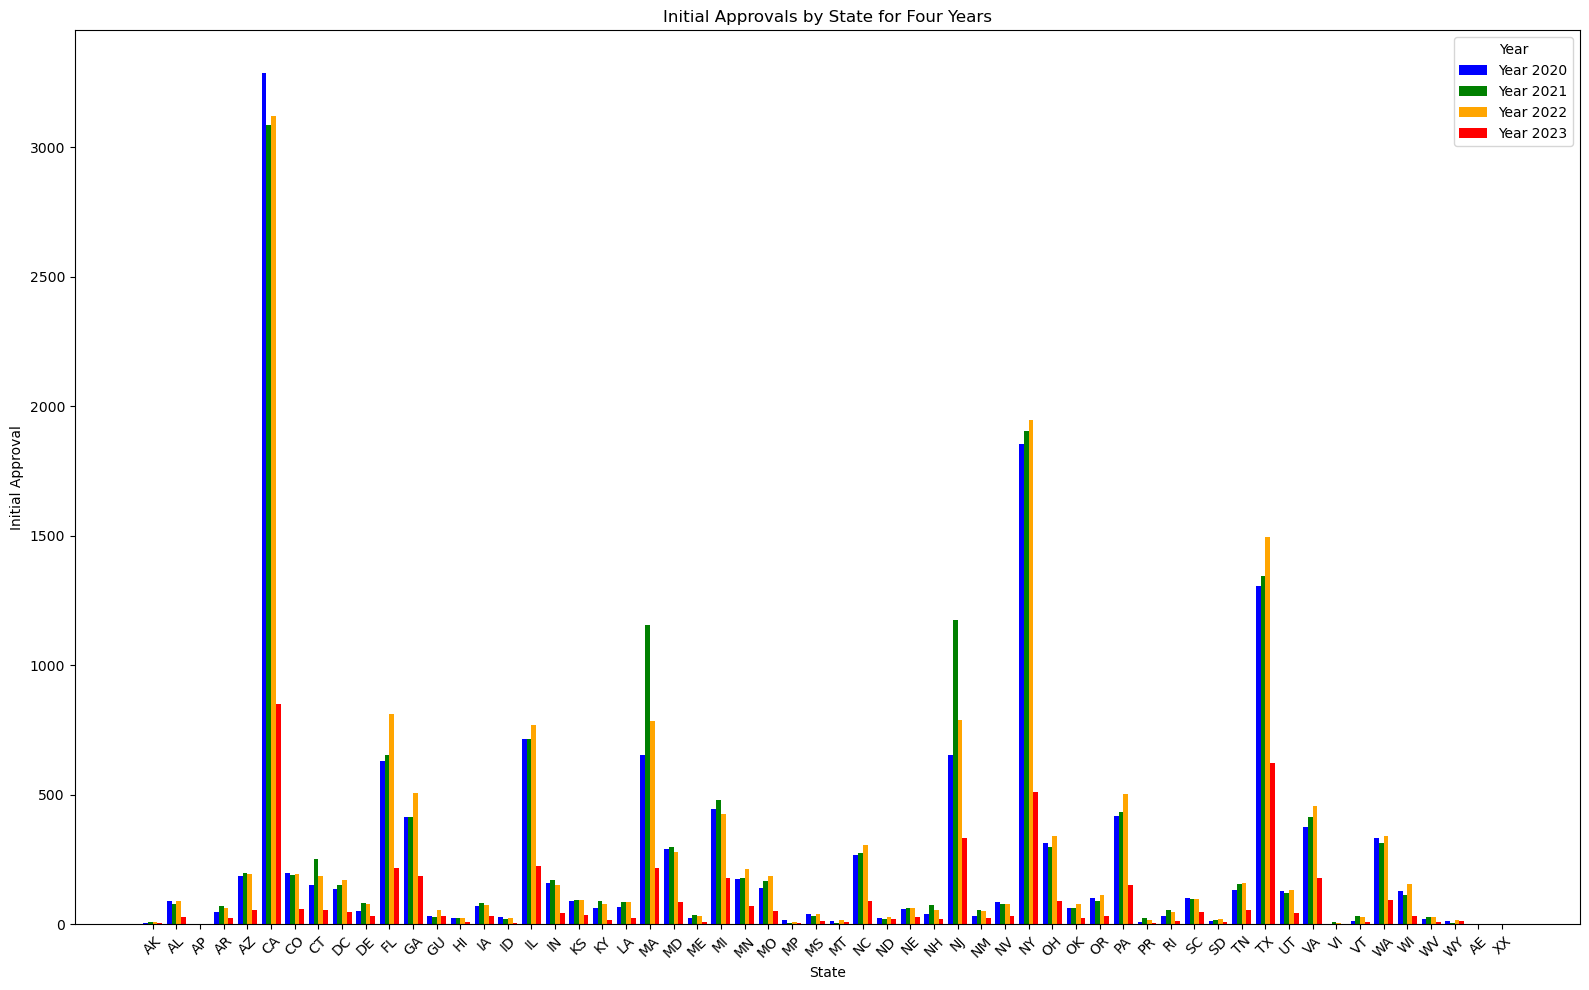

In [22]:
# Group the data by 'Fiscal Year' and 'State' and sum the 'Initial Approval'
state_approval_by_year = df.groupby(['Fiscal Year', 'State'])['Initial Approval'].sum().reset_index()

# Get unique states for x-axis labels
states = state_approval_by_year['State'].unique()

# Create a bar chart with different colors for each year
plt.figure(figsize=(16, 10))

years = [2020, 2021, 2022, 2023]
colors = ['blue', 'green', 'orange', 'red']

for i, year in enumerate(years):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    approvals = [year_data[year_data['State'] == state]['Initial Approval'].values[0] if not year_data[year_data['State'] == state].empty else 0 for state in states]
    
    # Position of bars for the current year
    x = np.arange(len(states))
    
    plt.bar(x + i*0.2, approvals, width=0.2, label=f'Year {year}', color=colors[i])

plt.xlabel('State')
plt.ylabel('Initial Approval')
plt.title('Initial Approvals by State for Four Years')
plt.xticks(np.arange(len(states)) + 0.3, states, rotation=45)
plt.legend(title='Year')
plt.tight_layout()

# Display the plot
plt.show()


In [23]:
# Define a function to get top N states with highest initial approvals for a given year
def top_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    top_states = year_data.nlargest(n, 'Initial Approval')
    return top_states

# Define a function to get bottom N states with lowest initial approvals for a given year
def bottom_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    bottom_states = year_data.nsmallest(n, 'Initial Approval')
    return bottom_states

# Get top three states with highest initial approvals for each year
top_states_approvals_2020 = top_n_states_approvals_by_year(2020)
top_states_approvals_2021 = top_n_states_approvals_by_year(2021)
top_states_approvals_2022 = top_n_states_approvals_by_year(2022)
top_states_approvals_2023 = top_n_states_approvals_by_year(2023)

# Get bottom three states with lowest initial approvals for each year
bottom_states_approvals_2020 = bottom_n_states_approvals_by_year(2020)
bottom_states_approvals_2021 = bottom_n_states_approvals_by_year(2021)
bottom_states_approvals_2022 = bottom_n_states_approvals_by_year(2022)
bottom_states_approvals_2023 = bottom_n_states_approvals_by_year(2023)

# Display the results
print(top_states_approvals_2020)
print(top_states_approvals_2021)
print(top_states_approvals_2022)
print(top_states_approvals_2023)
print("\nBottom 3 States with Lowest Initial Approvals in 2020:")
print(bottom_states_approvals_2020)
print(bottom_states_approvals_2021)
print(bottom_states_approvals_2022)
print(bottom_states_approvals_2023)


    Fiscal Year State  Initial Approval
5          2020    CA              3288
37         2020    NY              1856
47         2020    TX              1306
     Fiscal Year State  Initial Approval
60          2021    CA              3085
92          2021    NY              1906
102         2021    TX              1344
     Fiscal Year State  Initial Approval
117         2022    CA              3122
149         2022    NY              1947
159         2022    TX              1495
     Fiscal Year State  Initial Approval
174         2023    CA               851
216         2023    TX               622
206         2023    NY               510

Bottom 3 States with Lowest Initial Approvals in 2020:
    Fiscal Year State  Initial Approval
2          2020    AP                 0
50         2020    VI                 3
0          2020    AK                 7
     Fiscal Year State  Initial Approval
82          2021    MP                 7
84          2021    MT                 7
110      

##### From the above graph and observation, it's clearly showing that the CA state have more Initial Approvals in all the four Years followed by NY and TX. Simillarly, for least MP in year 2021 , AE in 2022, AP in 2020 nd AE in 2023.

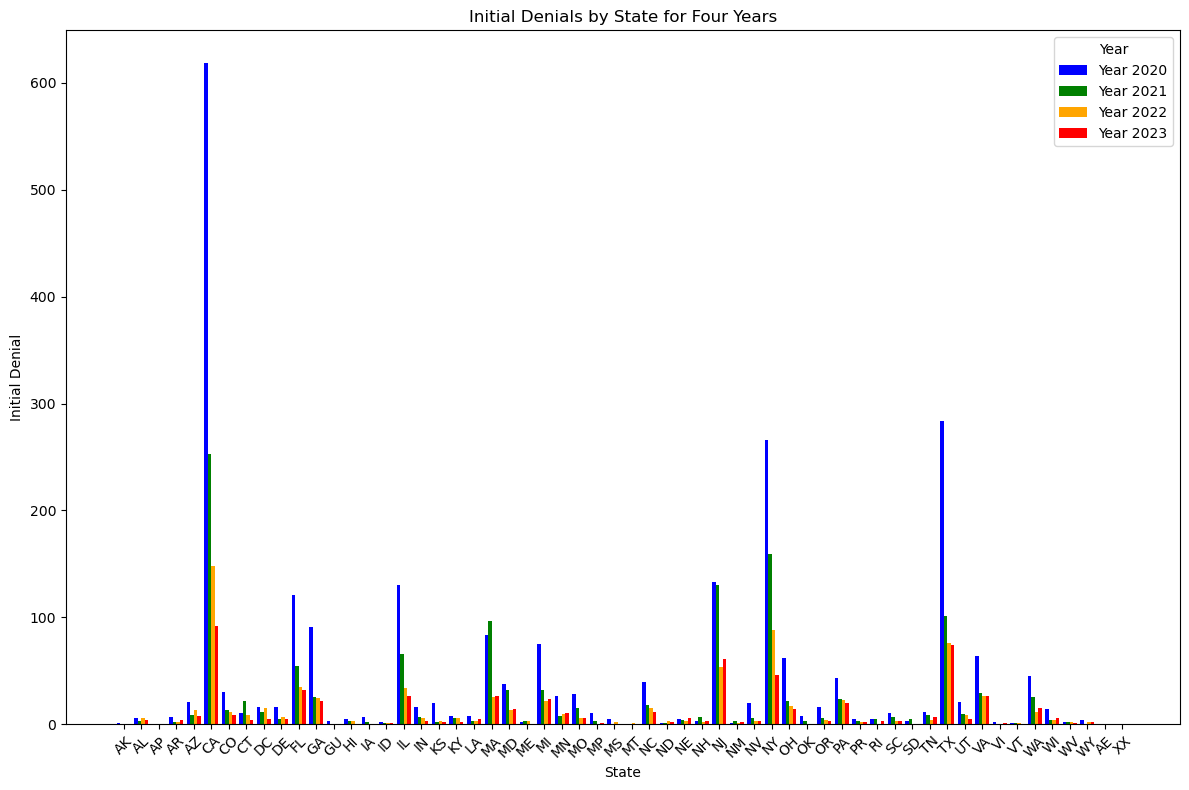

In [24]:
# Group the data by 'Fiscal Year' and 'State' and sum the 'Initial Approval'
state_approval_by_year = df.groupby(['Fiscal Year', 'State'])['Initial Denial'].sum().reset_index()

# Get unique states for x-axis labels
states = state_approval_by_year['State'].unique()

# Create a bar chart with different colors for each year
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
colors = ['blue', 'green', 'orange', 'red']

for i, year in enumerate(years):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    approvals = [year_data[year_data['State'] == state]['Initial Denial'].values[0] if not year_data[year_data['State'] == state].empty else 0 for state in states]
    
    # Position of bars for the current year
    x = np.arange(len(states))
    
    plt.bar(x + i*0.2, approvals, width=0.2, label=f'Year {year}', color=colors[i])

plt.xlabel('State')
plt.ylabel('Initial Denial')
plt.title('Initial Denials by State for Four Years')
plt.xticks(np.arange(len(states)) + 0.3, states, rotation=45)
plt.legend(title='Year')
plt.tight_layout()

# Display the plot
plt.show()


#### From the above graph and observation, it's clearly showing that the CA state have more Initial Denials in all the four Years followed by NY and TX. Simillarly, for least AK in year 2021 , AE in 2022, AP in 2020 nd AE in 2023.

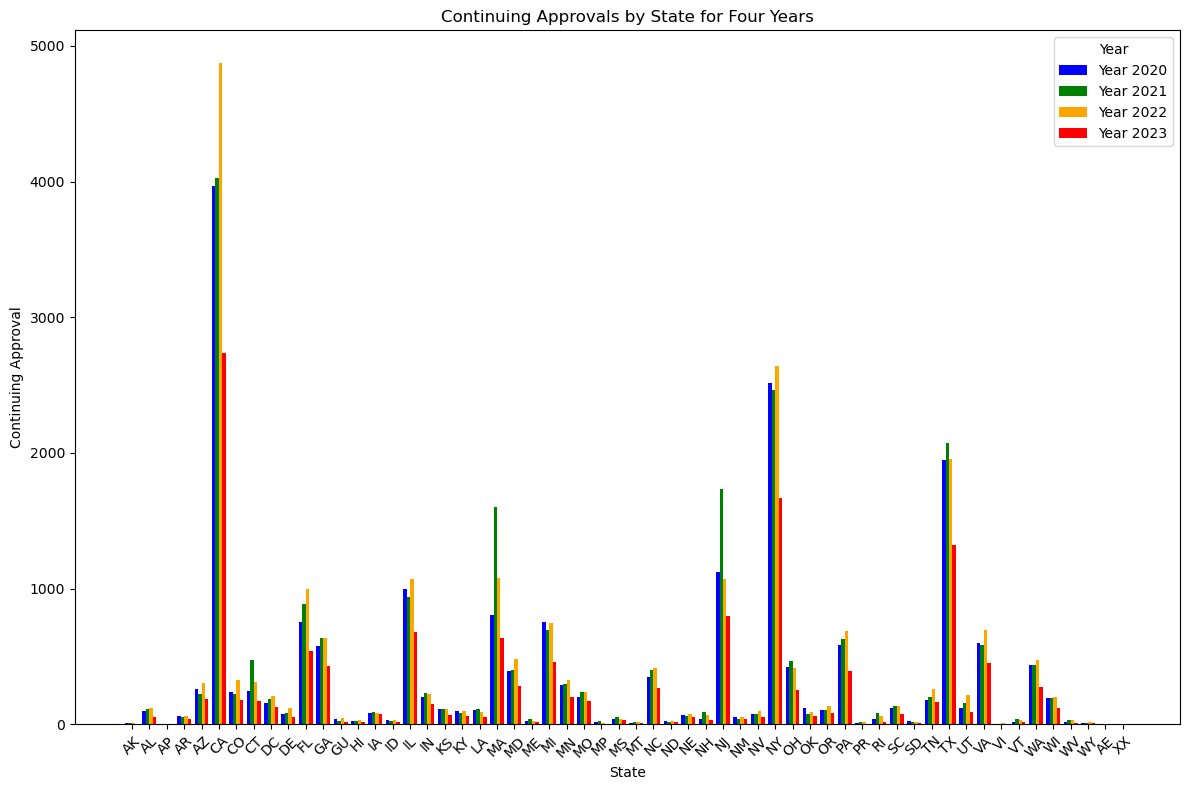

In [33]:
# Group the data by 'Fiscal Year' and 'State' and sum the 'Continuing Approval'
state_approval_by_year = df.groupby(['Fiscal Year', 'State'])['Continuing Approval'].sum().reset_index()

# Get unique states for x-axis labels
states = state_approval_by_year['State'].unique()

# Create a bar chart with different colors for each year
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
colors = ['blue', 'green', 'orange', 'red']

highest_approvals = []

for i, year in enumerate(years):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    approvals = [year_data[year_data['State'] == state]['Continuing Approval'].values[0] if not year_data[year_data['State'] == state].empty else 0 for state in states]
    
    highest_approvals.append(max(approvals))  # Store the highest approval for each year
    
    # Position of bars for the current year
    x = np.arange(len(states))
    
    plt.bar(x + i*0.2, approvals, width=0.2, label=f'Year {year}', color=colors[i])

plt.xlabel('State')
plt.ylabel('Continuing Approval')
plt.title('Continuing Approvals by State for Four Years')
plt.xticks(np.arange(len(states)) + 0.3, states, rotation=45)
plt.legend(title='Year')
plt.tight_layout()

In [34]:
# Define a function to get top N states with highest initial approvals for a given year
def top_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    top_states = year_data.nlargest(n, 'Continuing Approval')
    return top_states

# Define a function to get bottom N states with lowest initial approvals for a given year
def bottom_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    bottom_states = year_data.nsmallest(n, 'Continuing Approval')
    return bottom_states

# Get top three states with highest initial approvals for each year
top_states_approvals_2020 = top_n_states_approvals_by_year(2020)
top_states_approvals_2021 = top_n_states_approvals_by_year(2021)
top_states_approvals_2022 = top_n_states_approvals_by_year(2022)
top_states_approvals_2023 = top_n_states_approvals_by_year(2023)

# Get bottom three states with lowest initial approvals for each year
bottom_states_approvals_2020 = bottom_n_states_approvals_by_year(2020)
bottom_states_approvals_2021 = bottom_n_states_approvals_by_year(2021)
bottom_states_approvals_2022 = bottom_n_states_approvals_by_year(2022)
bottom_states_approvals_2023 = bottom_n_states_approvals_by_year(2023)

# Display the results
print(top_states_approvals_2020)
print(top_states_approvals_2021)
print(top_states_approvals_2022)
print(top_states_approvals_2023)
print("\nBottom 3 States with Lowest  Continuing Approval in 2020:")
print(bottom_states_approvals_2020)
print(bottom_states_approvals_2021)
print(bottom_states_approvals_2022)
print(bottom_states_approvals_2023)

    Fiscal Year State  Continuing Approval
5          2020    CA                 3967
37         2020    NY                 2513
47         2020    TX                 1950
     Fiscal Year State  Continuing Approval
60          2021    CA                 4030
92          2021    NY                 2461
102         2021    TX                 2074
     Fiscal Year State  Continuing Approval
117         2022    CA                 4871
149         2022    NY                 2639
159         2022    TX                 1956
     Fiscal Year State  Continuing Approval
174         2023    CA                 2737
206         2023    NY                 1667
216         2023    TX                 1325

Bottom 3 States with Lowest  Continuing Approval in 2020:
    Fiscal Year State  Continuing Approval
2          2020    AP                    1
50         2020    VI                    6
29         2020    MT                    8
     Fiscal Year State  Continuing Approval
105         2021    VI   

#### From above observation, CA has the highest Continuing approval in all years and AP, VI, AE and AE had least Continuing approvals in years followed by 2020, 2021, 2022 and 2023.

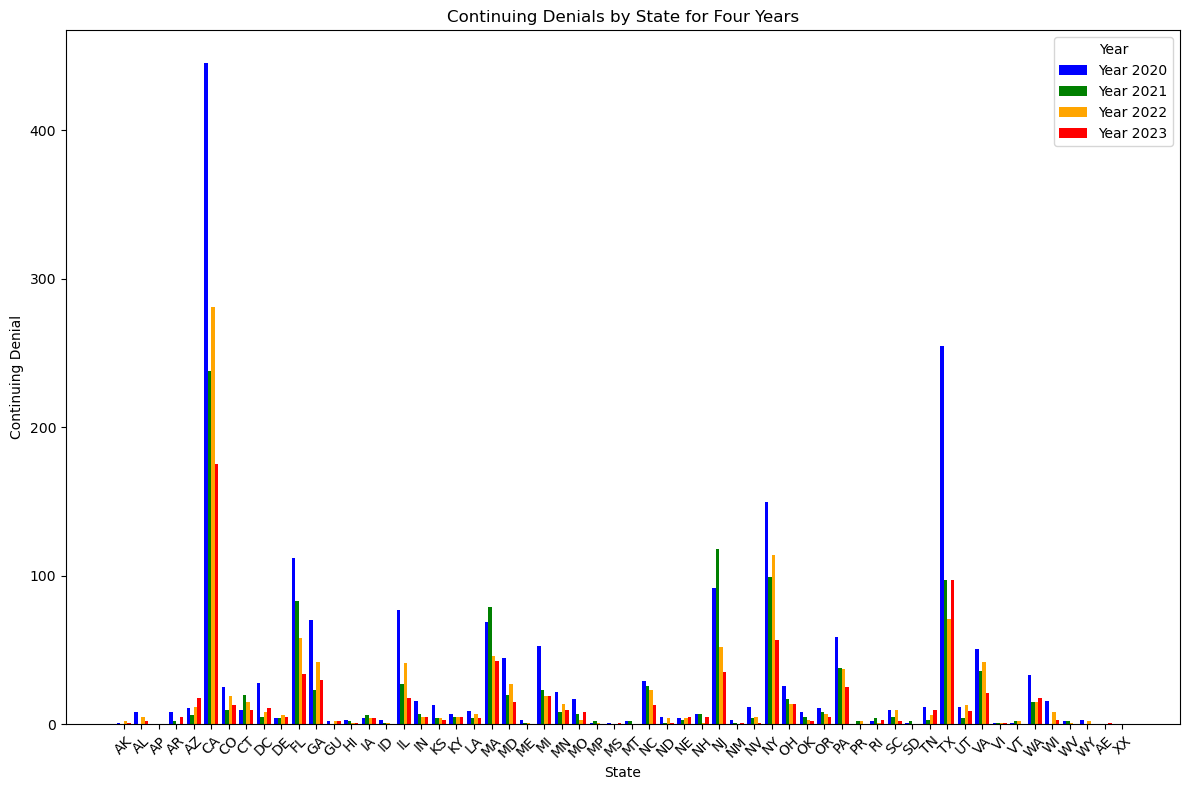

In [35]:
# Group the data by 'Fiscal Year' and 'State' and sum the 'Continuing Approval'
state_approval_by_year = df.groupby(['Fiscal Year', 'State'])['Continuing Denial'].sum().reset_index()

# Get unique states for x-axis labels
states = state_approval_by_year['State'].unique()

# Create a bar chart with different colors for each year
plt.figure(figsize=(12, 8))

years = [2020, 2021, 2022, 2023]
colors = ['blue', 'green', 'orange', 'red']

highest_approvals = []

for i, year in enumerate(years):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    approvals = [year_data[year_data['State'] == state]['Continuing Denial'].values[0] if not year_data[year_data['State'] == state].empty else 0 for state in states]
    
    highest_approvals.append(max(approvals))  # Store the highest approval for each year
    
    # Position of bars for the current year
    x = np.arange(len(states))
    
    plt.bar(x + i*0.2, approvals, width=0.2, label=f'Year {year}', color=colors[i])

plt.xlabel('State')
plt.ylabel('Continuing Denial')
plt.title('Continuing Denials by State for Four Years')
plt.xticks(np.arange(len(states)) + 0.3, states, rotation=45)
plt.legend(title='Year')
plt.tight_layout()

In [36]:
# Define a function to get top N states with highest initial approvals for a given year
def top_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    top_states = year_data.nlargest(n, 'Continuing Denial')
    return top_states

# Define a function to get bottom N states with lowest initial approvals for a given year
def bottom_n_states_approvals_by_year(year, n=3):
    year_data = state_approval_by_year[state_approval_by_year['Fiscal Year'] == year]
    bottom_states = year_data.nsmallest(n, 'Continuing Denial')
    return bottom_states

# Get top three states with highest initial approvals for each year
top_states_approvals_2020 = top_n_states_approvals_by_year(2020)
top_states_approvals_2021 = top_n_states_approvals_by_year(2021)
top_states_approvals_2022 = top_n_states_approvals_by_year(2022)
top_states_approvals_2023 = top_n_states_approvals_by_year(2023)

# Get bottom three states with lowest initial approvals for each year
bottom_states_approvals_2020 = bottom_n_states_approvals_by_year(2020)
bottom_states_approvals_2021 = bottom_n_states_approvals_by_year(2021)
bottom_states_approvals_2022 = bottom_n_states_approvals_by_year(2022)
bottom_states_approvals_2023 = bottom_n_states_approvals_by_year(2023)

# Display the results
print(top_states_approvals_2020)
print(top_states_approvals_2021)
print(top_states_approvals_2022)
print(top_states_approvals_2023)
print("\nBottom 3 States with Lowest  Continuing Denial in 2020:")
print(bottom_states_approvals_2020)
print(bottom_states_approvals_2021)
print(bottom_states_approvals_2022)
print(bottom_states_approvals_2023)

    Fiscal Year State  Continuing Denial
5          2020    CA                445
47         2020    TX                255
37         2020    NY                150
    Fiscal Year State  Continuing Denial
60         2021    CA                238
89         2021    NJ                118
92         2021    NY                 99
     Fiscal Year State  Continuing Denial
117         2022    CA                281
149         2022    NY                114
159         2022    TX                 71
     Fiscal Year State  Continuing Denial
174         2023    CA                175
216         2023    TX                 97
206         2023    NY                 57

Bottom 3 States with Lowest  Continuing Denial in 2020:
    Fiscal Year State  Continuing Denial
2          2020    AP                  0
42         2020    PR                  0
0          2020    AK                  1
    Fiscal Year State  Continuing Denial
56         2021    AK                  0
57         2021    AL            

#### From above observation, CA has the highest Continuing Denial in all years and AP, AK, AE and ID had least Continuing approvals in years followed by 2020, 2021, 2022 and 2023.

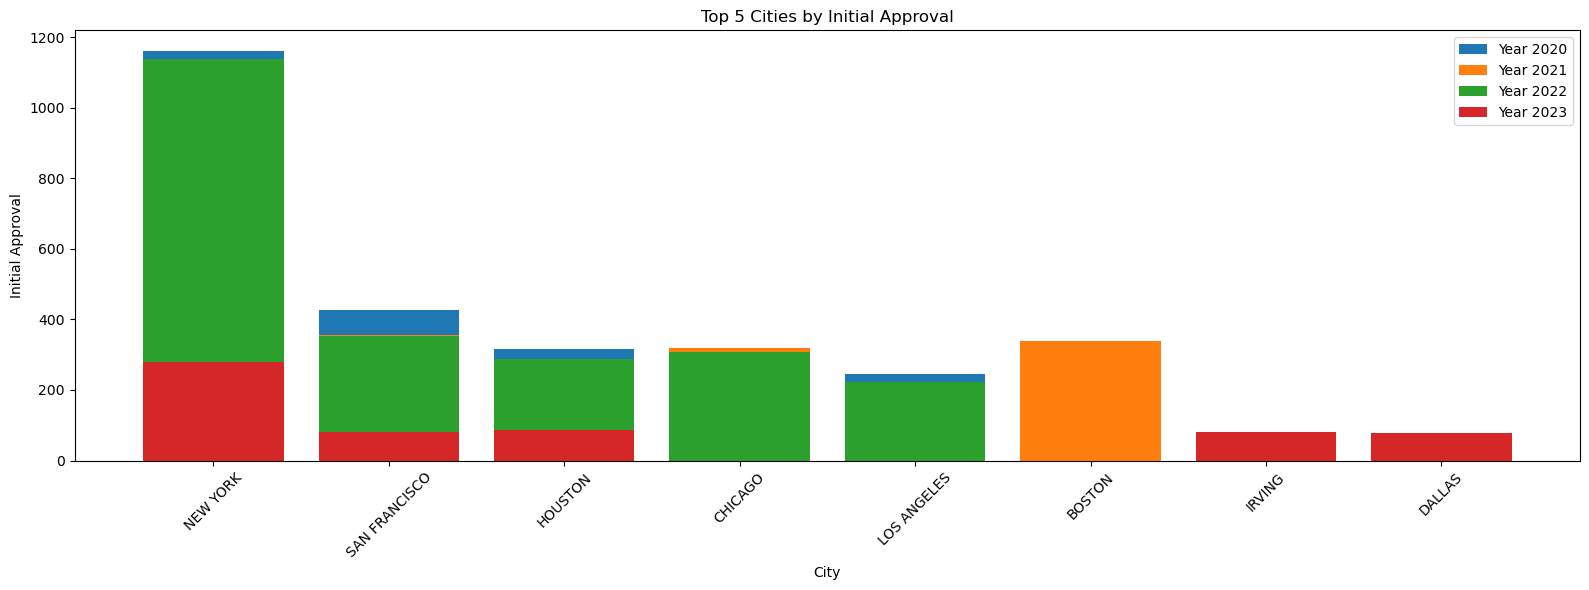

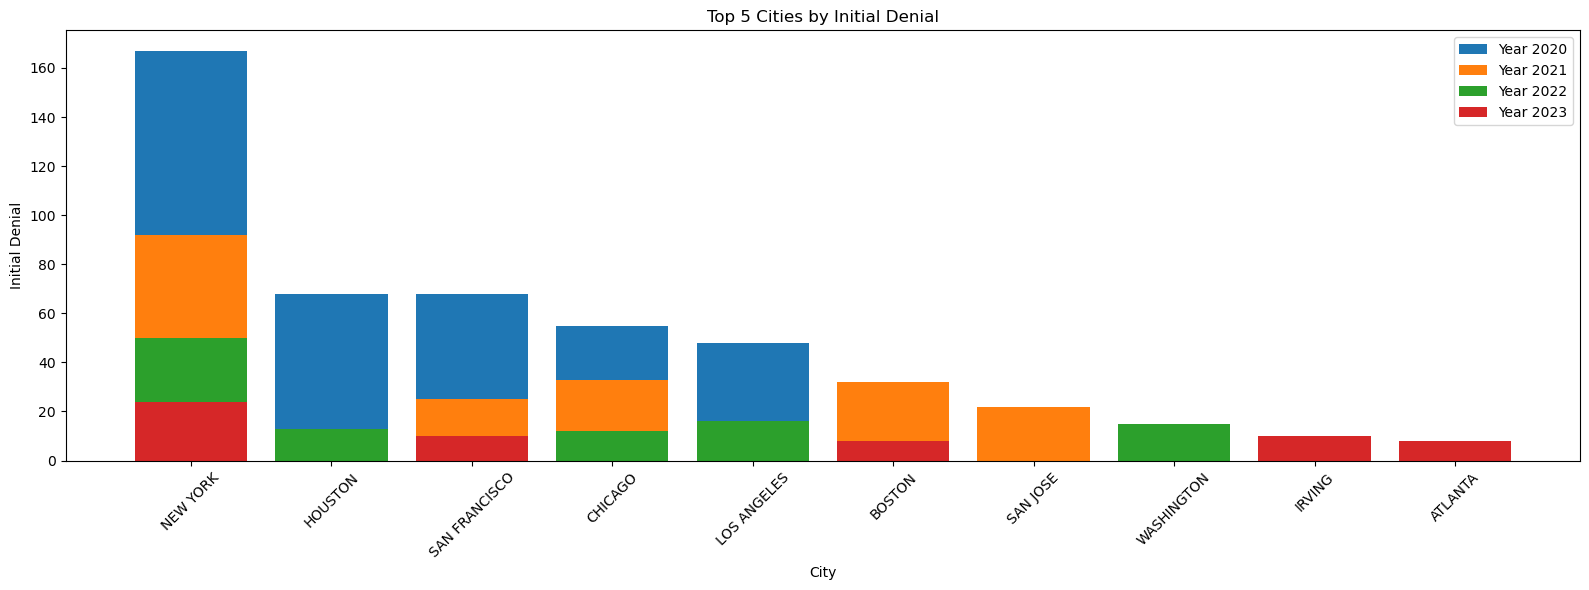

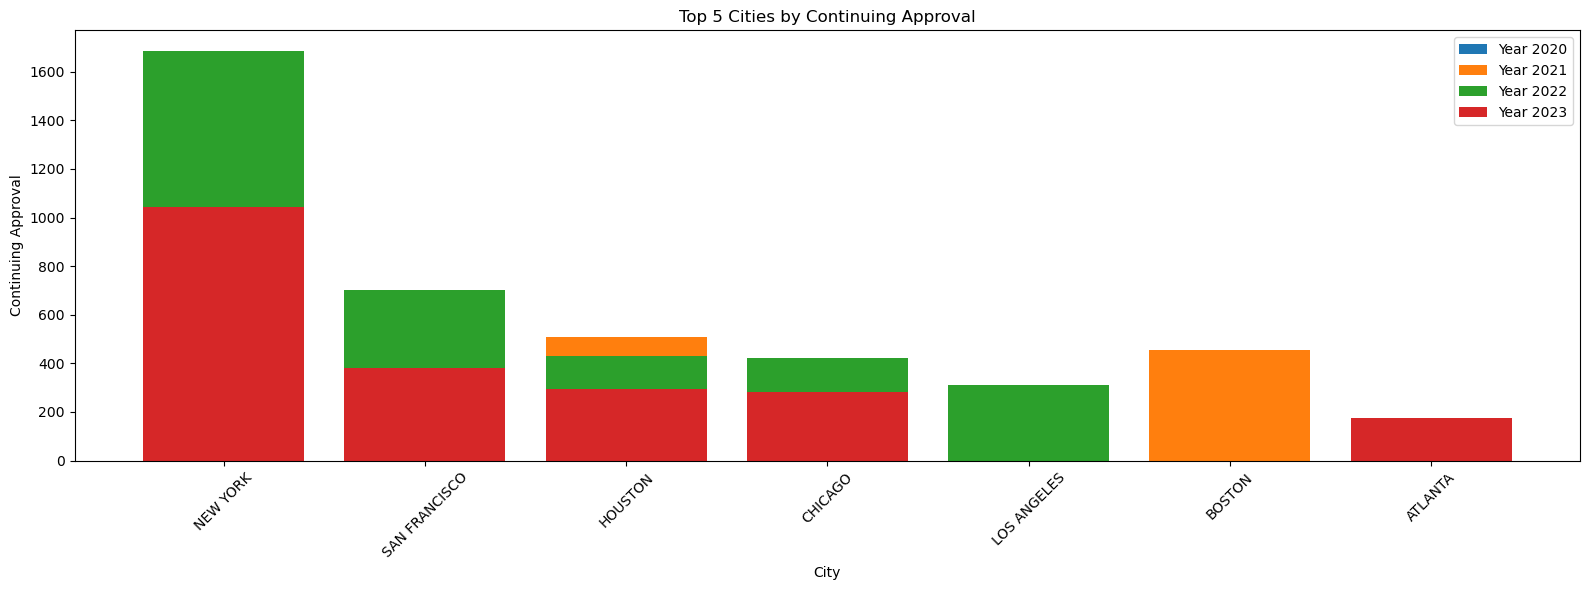

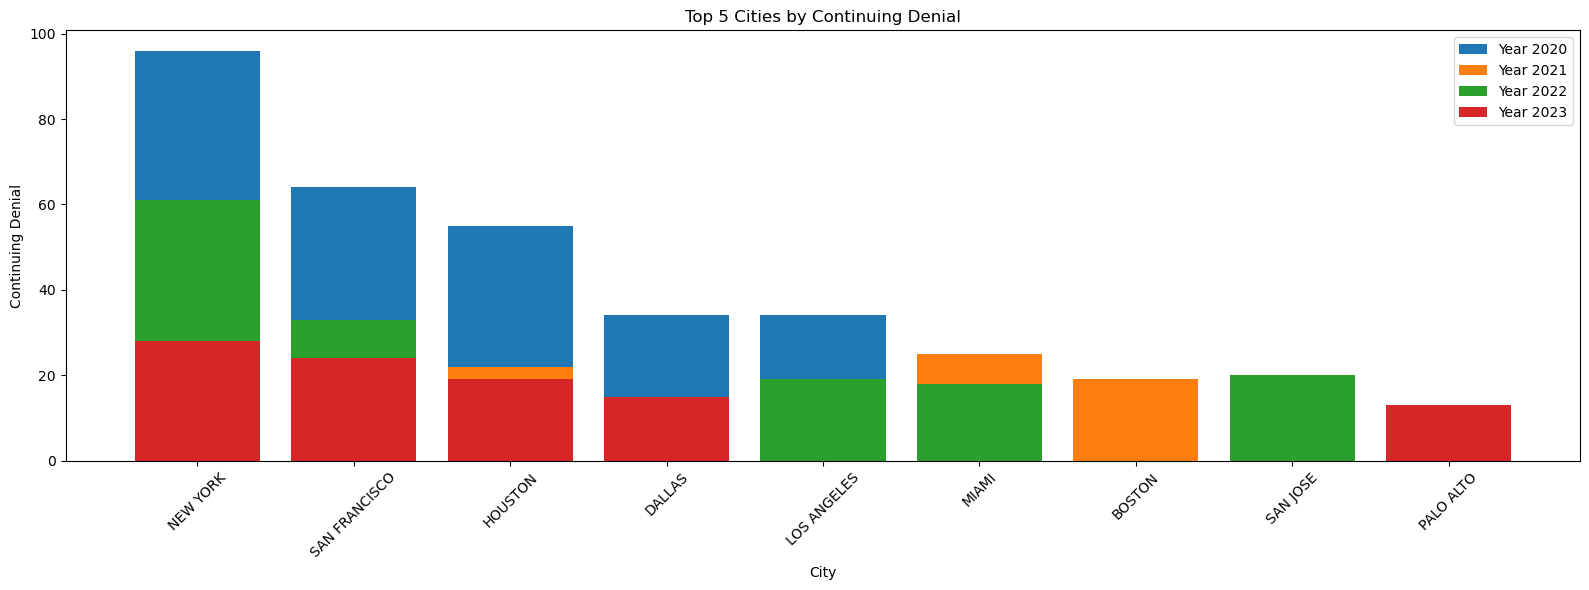

In [37]:
# Group the data by 'Fiscal Year' and 'City' and sum the counts for each category
city_counts_by_year = df.groupby(['Fiscal Year', 'City'])[['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']].sum().reset_index()

# Get the top 5 cities for each category and each year
top_cities = {}
categories = ['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']

for category in categories:
    top_cities[category] = {}
    for year in years:
        year_data = city_counts_by_year[city_counts_by_year['Fiscal Year'] == year]
        top_5_cities = year_data.nlargest(5, category)
        top_cities[category][year] = top_5_cities

# Create separate graphs for each category
for category in categories:
    plt.figure(figsize=(16, 6))
    plt.title(f'Top 5 Cities by {category}')
    for year in years:
        top_5_cities_data = top_cities[category][year]
        plt.bar(top_5_cities_data['City'], top_5_cities_data[category], label=f'Year {year}')
    plt.xlabel('City')
    plt.ylabel(category)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


#### Above Chart shows the Initial approvals of all cities in the years 2020, 2021, 2022 and 2023. The data from the above states with highest Initial Approval matches perfectly with the city of the same state. The data is very acurate and shown perfectly in the graph with respective city and state with the percentage

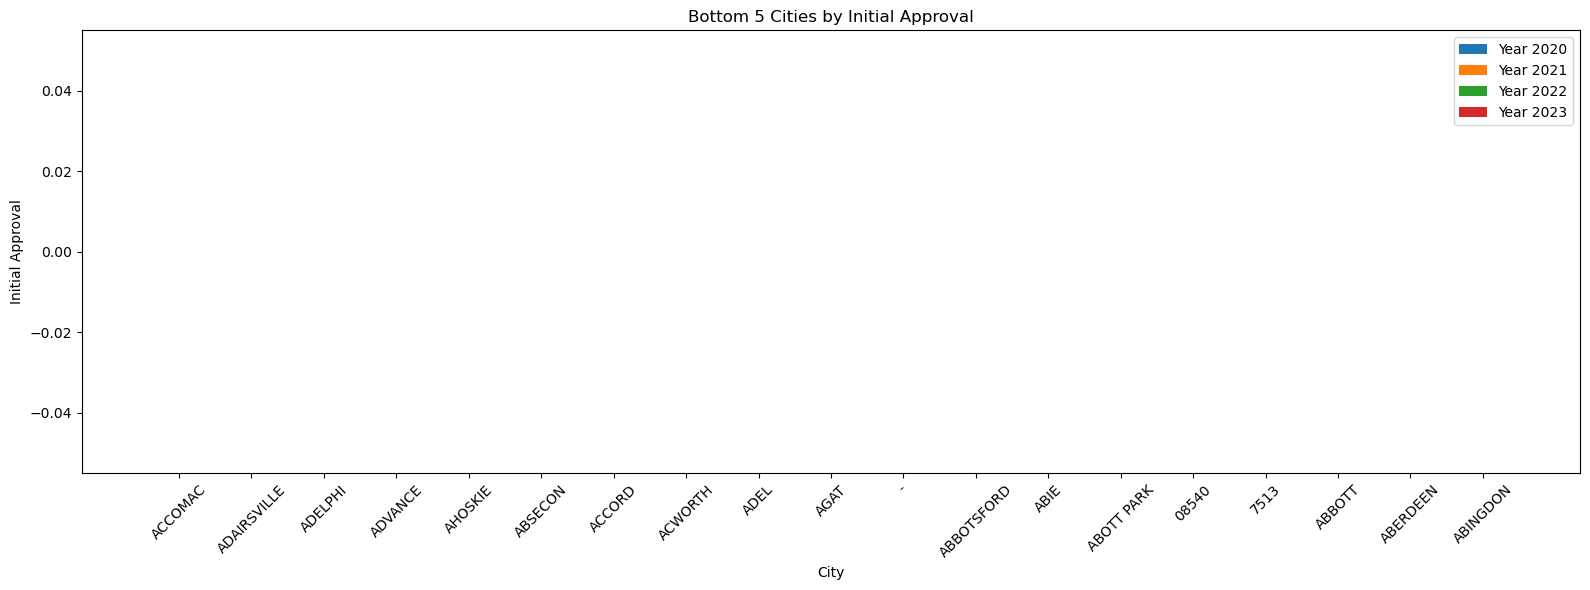

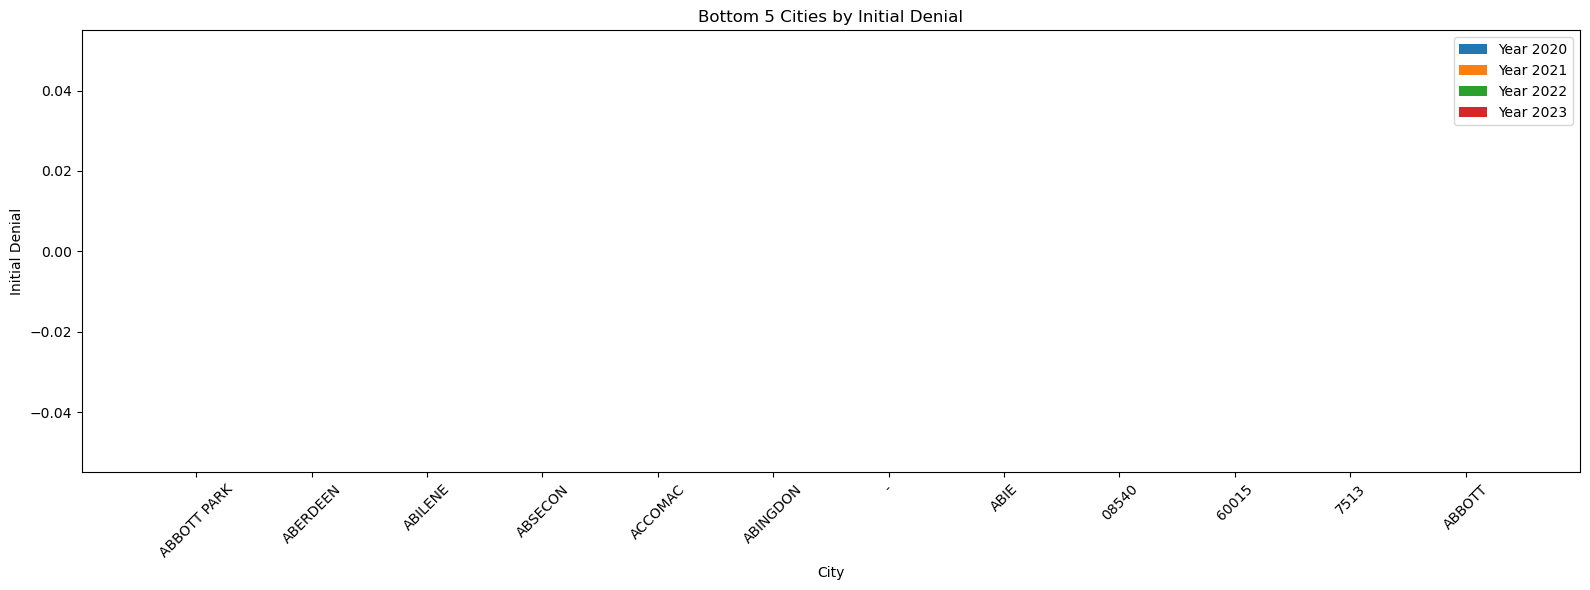

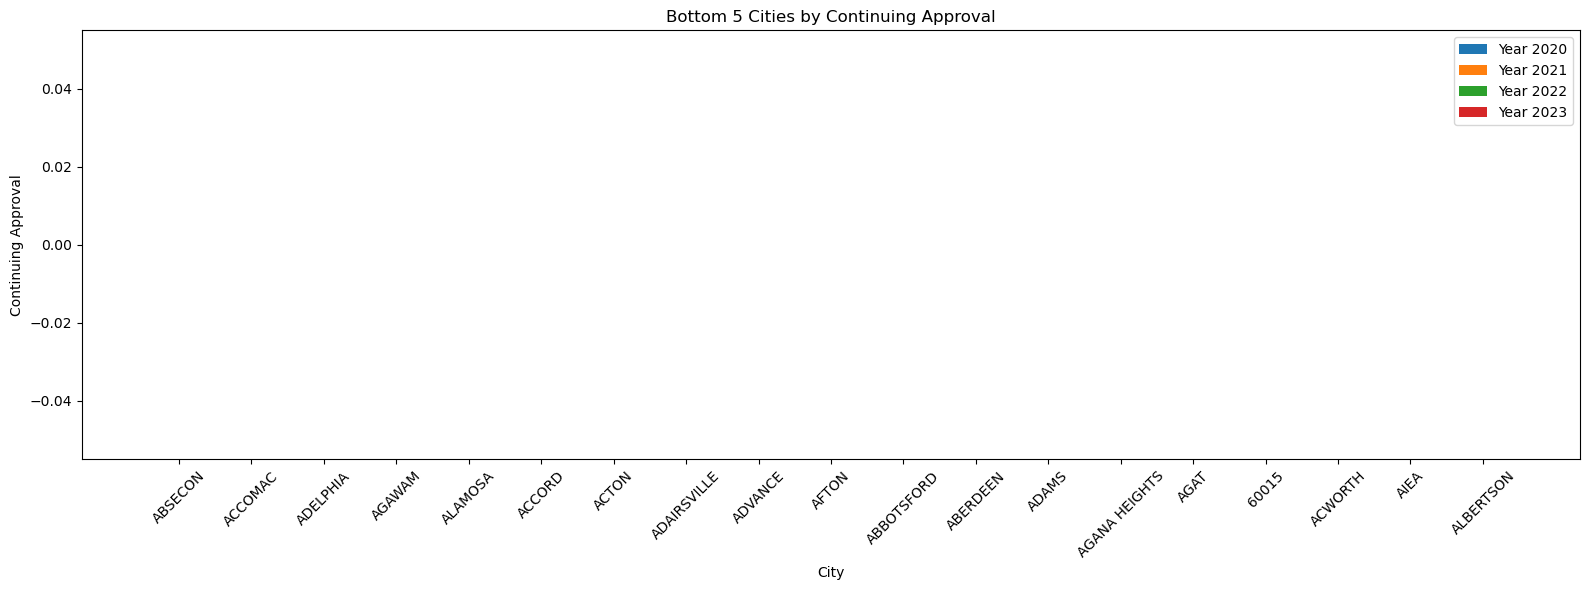

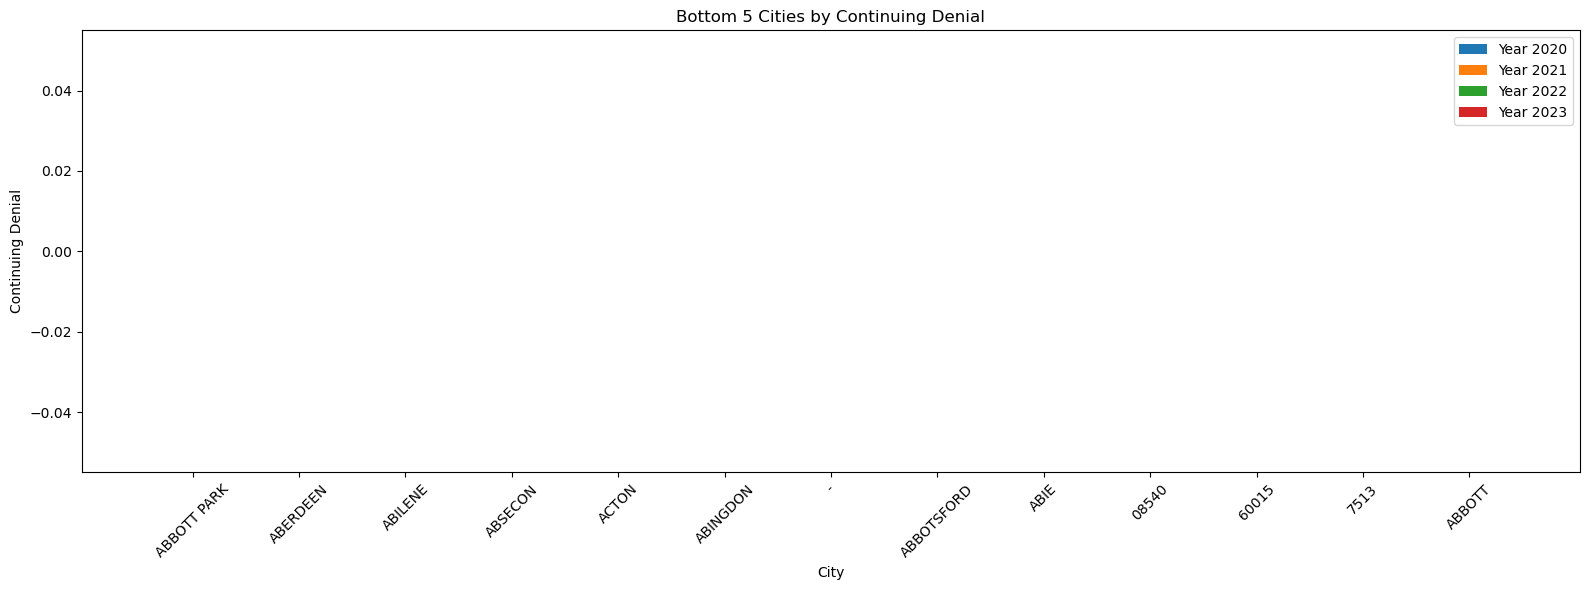

In [38]:
# Group the data by 'Fiscal Year' and 'City' and sum the counts for each category
city_counts_by_year = df.groupby(['Fiscal Year', 'City'])[['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']].sum().reset_index()

# Get the least 5 cities for each category and each year
bottom_cities = {}
categories = ['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']

for category in categories:
    bottom_cities[category] = {}
    for year in years:
        year_data = city_counts_by_year[city_counts_by_year['Fiscal Year'] == year]
        bottom_5_cities = year_data.nsmallest(5, category)
        bottom_cities[category][year] = bottom_5_cities

# Create separate graphs for each category
for category in categories:
    plt.figure(figsize=(16, 6))
    plt.title(f'Bottom 5 Cities by {category}')
    for year in years:
        bottom_5_cities_data = bottom_cities[category][year]
        plt.bar(bottom_5_cities_data['City'], bottom_5_cities_data[category], label=f'Year {year}')
    plt.xlabel('City')
    plt.ylabel(category)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


#### From above graph, the bottom cities have 0 Approvals and 0 denials hence, graph clearly showing nothing with bottom cities.

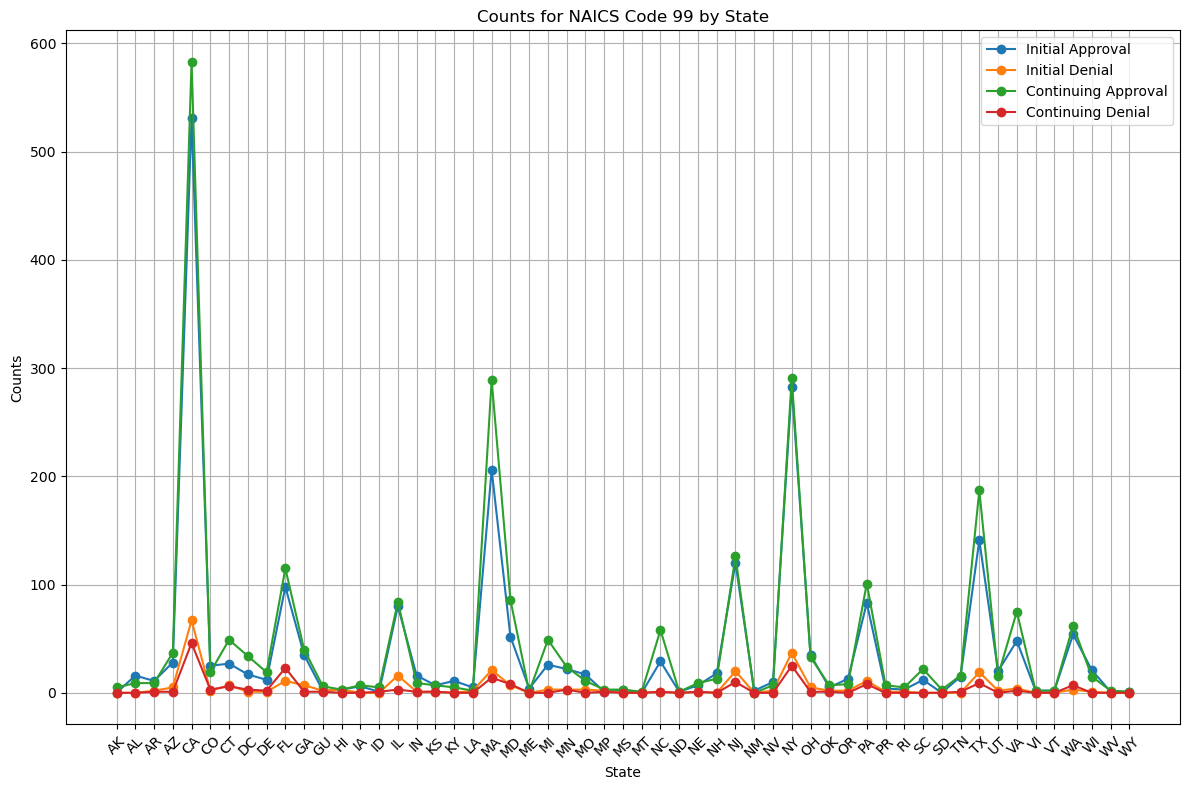

In [39]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Filter data for NAICS code 99
naics_99_data = df[df['NAICS'] == 99]

# Group the data by 'State' and sum the counts for each category
state_counts = naics_99_data.groupby('State')[['Initial Approval', 'Initial Denial', 'Continuing Approval', 'Continuing Denial']].sum()

# Create a single graph with grid
plt.figure(figsize=(12, 8))

# Plot each category
plt.plot(state_counts.index, state_counts['Initial Approval'], marker='o', label='Initial Approval')
plt.plot(state_counts.index, state_counts['Initial Denial'], marker='o', label='Initial Denial')
plt.plot(state_counts.index, state_counts['Continuing Approval'], marker='o', label='Continuing Approval')
plt.plot(state_counts.index, state_counts['Continuing Denial'], marker='o', label='Continuing Denial')

# Add labels and legend
plt.title('Counts for NAICS Code 99 by State')
plt.xlabel('State')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the graph
plt.tight_layout()
plt.show()


#### This graph shows the visual representaion of states with the NAICS code 99, it means the industry is unknown. Any petition that had a blank code was assigned as 99 as well. CA has highest approvals and denials for unknown industry in all four years, followed by MA and NY.

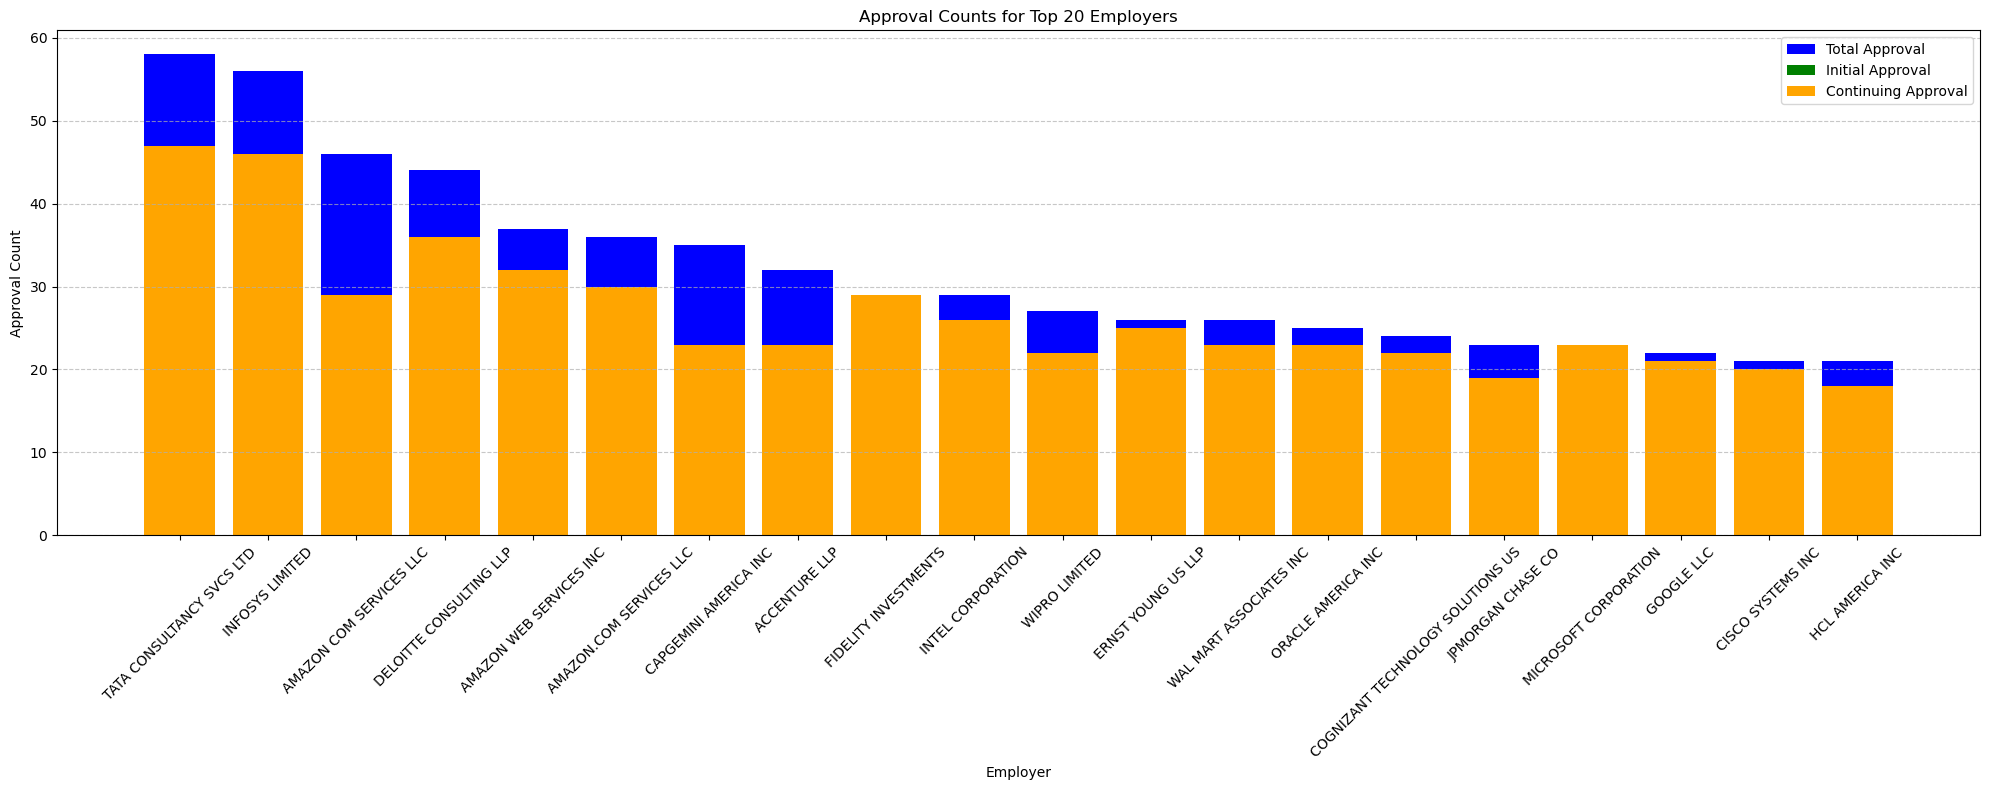

In [50]:
# Group the data by 'Employer' and sum the 'Initial Approval' and 'Continuing Approval'
employer_approval_counts = df.groupby('Employer')[['Initial Approval', 'Continuing Approval']].sum()

# Sum the total approvals (initial + continuing) for each employer
employer_approval_counts['Total Approval'] = employer_approval_counts['Initial Approval'] + employer_approval_counts['Continuing Approval']

# Select the top 20 employers based on 'Total Approval'
top_20_employers = employer_approval_counts['Total Approval'].nlargest(20)

# Create a bar chart for the top 20 employers
plt.figure(figsize=(20, 8))
plt.bar(top_20_employers.index, top_20_employers.values, color='blue', label='Total Approval')
plt.bar(top_20_employers.index, employer_approval_counts.loc[top_20_employers.index, 'Initial Approval'], color='green', label='Initial Approval')
plt.bar(top_20_employers.index, employer_approval_counts.loc[top_20_employers.index, 'Continuing Approval'], color='orange', label='Continuing Approval')

plt.xlabel('Employer')
plt.ylabel('Approval Count')
plt.title('Approval Counts for Top 20 Employers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.legend()
plt.tight_layout()

plt.show()


#### List of employers who has highest approval rate is shown in above graph, TATA CONSULTANCY SVCS LTD has highest approval rate among all.

#### Numerous inferences can be made after analyzing the above graphics and data set:

- First Authorizations:

The number of initial approvals is comparatively larger in states like Texas, New York, and California.

- First Refusals:

New York, Texas, and California show higher rates of initial denials, which may be related to strict standards or legal obligations.

- Sustained Authorizations:

Texas, New York, and California have greater percentages of Continuing Approvals, which suggests that related businesses have been there for a long time.

- Persisting Defiants:

Continuing Denials are generally lower in NAICS Code 99 firms than in other categories, indicating a higher likelihood of continued operations upon approval.

- Anomalies:

Certain states exhibit very high or low numbers, which could be related to particular regional variables or municipal regulations.